# Chapter 9: Plotting and Visualization

In [1]:
# %matplotlib notebook
# NOTE: This may not work in VSCode

import pandas as pd

## 9.1 A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

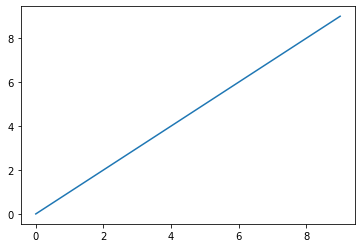

In [4]:
plt.plot(data)

### 9.1.1 Figures and Subplots

Plots in matplotlib reside within a `Figure` object.

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

You can't make a plot with a blank figure. You have to create one or more subplots using `add_subplot`.

In [9]:
ax1 = fig.add_subplot(2, 2, 1) # figure=2x2 (4 plots in total), selecting 1st
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

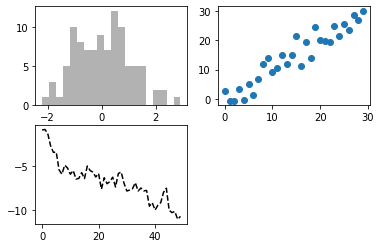

In [15]:
# All in one cell
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

> Note: Code is added in cell above, all in one cell.

`plt.plot` draws on the last figure and subplot used (creating one if necessary).

`'k--'` is a style option instructing matplotlib to plot a black dashed line.

Objects returned by `fig.add_subplot` are `AxesSubplot` objects and can be plotted by calling each one's instance method.

`plt.subplots` creates a new figure and returns a NumPy array containing the created subplot objects.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

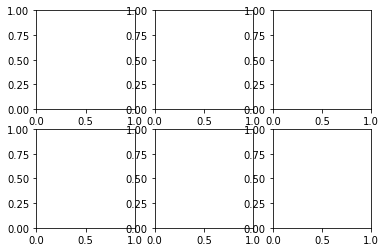

In [16]:
fig, axes = plt.subplots(2, 3)
axes

In [18]:
# Axes array can be indexed like a two-dimensional array
axes[0, 1]

<AxesSubplot:>

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots.

Use `subplots_adjust` to change the spacing. `wspace` and `hspace` controls the percent of the figure width and height to use as spacing between subplots.


In [22]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

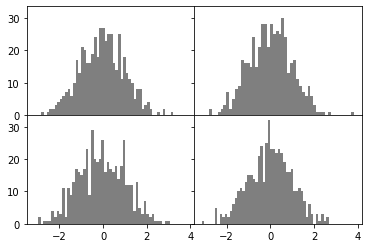

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 Colors, Markers, and Line Styles

To plot x versus y with green dashes,  
>
`ax.plot(x, y, 'g--')`  

and can be expressed more explicitly as:  
>
`ax.plot(x, y, linestyle='--', color='g')`

Line plots can have *markers* to highlight the actual data points.

In [32]:
from numpy.random import randn

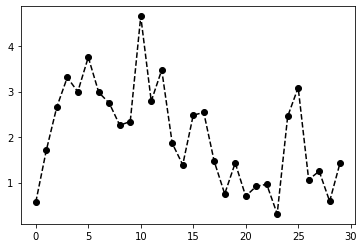

In [36]:
plt.plot(randn(30).cumsum(), 'ko--')

Written more explicitly,  
>
`plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')`

Subsequent points are linearly interpolated by default. This can be altered with `drawstyle` option.

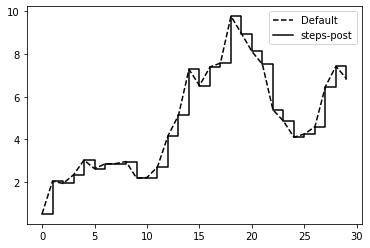

In [43]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Since we passed the `label` arguments to `plot`, we are able to create a plot legend to identify each line using `plt.legend`.

### 9.1.3 Ticks, Labels, and Legends

2 ways for plot decorations:  
- Use procedural `pyplot` interface (`matplotlib.pyplot`)
- Use more object-oriented native matplotlib API

The `pyplot` interface consists of methods like `xlim`, `xticks`, and `xticklabels`, controlling plot range, tick locations, and tick labels. And can be: 
- Called with no arguments returns the current parameter value (`plt.xlim()` returns the current x-axis plotting range)
- Called with parameters sets the parameter value (`plt.xlim([0, 10])` sets the x-axis range to 0-10)

All methods act on the active or most recently used `AxesSubplot`.

In the case of `xlim` corresponds to two methods on the subplot object `ax.get_xlim` and `ax.set_xlim`.

> Note: If working with multiple subplots, use subplot instance methods to be more explicit.

#### Setting the title, axis labels, ticks, and ticklabels

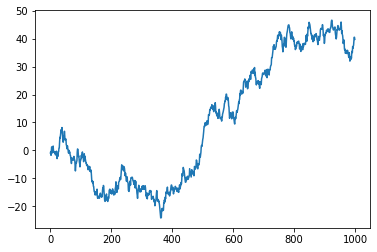

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change x-axis ticks, use `set_xticks` and `set_xticklabels`.  
`set_xticks` instructs matplotlib where to place the ticks along the data range.  
`set_xticklabels` to set any other values as the labels.

`rotation` option sets the x tick labels at a $30^\circ$ rotation.

In [45]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

`set_xlabel` gives a name to the x-axis.  
`set_title` gives the subplot title.

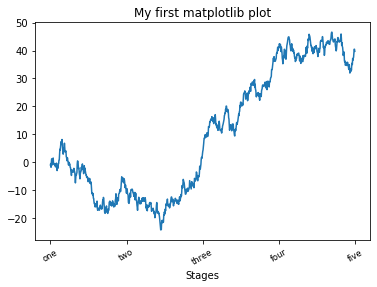

In [46]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

Setting y-axis is the same process. `axes` class has a `set` method that allows batch setting of plot properties. We could have written:

>
    props = {
        'title': 'My first matplotlib plot',
        'xlabel': 'Stages'
    }
    ax.set(**props)

#### Adding legends

The easiest is to pass the `label` argument when adding each piece of the plot.

In [47]:
from numpy.random import randn

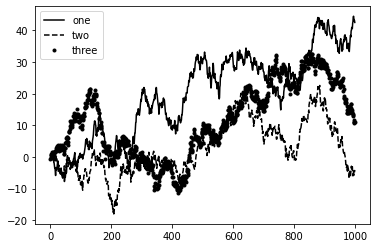

In [52]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # Can also use plt.legend()

`loc` tells matplotlib where to place the plot. `best` is a good option as it will choose a location that is most out of the way.

To exclude one or more elements from the legend, pass no label or `label='_nolegend_'`.

### 9.1.4 Annotations and Drawing on a Subplot

You can add annotations and text using `text`, `arrow`, and `annotate` functions.  
`text` draw text at given coordinates (x, y) on the plot with optional custom styling.  

>
     ax.text(x, y, 'Hello world!',
            family='monospace', fontsize-10)

Annotations can draw both text and arrows arranged appropriately.

Let's plot the closing S&P 500 index price since 2007 and annotate with some important dates from 2008-2009 financial crisis.

In [3]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

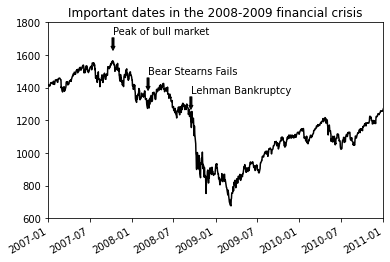

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('Examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

matplotlib has objects that represent many common shapes, referred to as *patches*. `Rectangle` and `Circle` are found in `matplotlib.pyplot` but the full list is in `matplotlib.patches`.

To add a shape to a plot, you create the patch object and add it to a subplot by calling `ax.add_patch(shp)`.

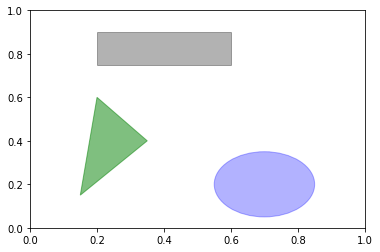

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


### 9.1.5 Saving Plots to File

You can save the active figure using `plt.savefig`, equivalent to figure object's `savefig` instance method.

For example, to save an SVG version of a figure,

    plt.savefig('figpath.svg')

To get the same plot as a PNG with minimal whitespace around the plot (`bbox_inches`) and at 400 DPI (`dpi`),

    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

`savefig` can write to any file-like object such as BytesIO, and not just to disk.

>
    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()

### 9.1.6 matplotlib Configuration

One way to modify the configuration programmatically from Python is to use the `rc` method.

For example, to set the global default figure size to be 10x10,

    plt.rc('figure', figsize=(10, 10))

The first argument to `rc` is the component you wish to customize such as `'figure'`, `'axes'`, `'xtick'`, `'ytick'`, `'grid'`, `'legend'`.  
After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options is as a dict.

    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size': 'small'}
    plt.rc('font', **font_options)

For more extensive customization, matplotlib comes with a config file `matplotlibrc` in `matplotlib/mpl-data` directory. Customize the file and place in home directory titled `.matplotlibrc` and it will be loaded each time you use matplotlib.

## 9.2 Plotting with pandas and seaborn

### 9.2.1 Line Plots

### 9.2.2 Bar Plots

### 9.2.3 Histograms and Density Plots

### 9.2.4 Scatter or Point Plots

### 9.2.5 Facet Grids and Categorical Data

## 9.3 Other Python Visualization Tools

## 9.4 Conclusion